### Problem: Calculate the Simple Moving Average (SMA)

A simple moving average (SMA) is a common technical indicator used in finance to smooth out price data by creating a constantly updated average price. It is calculated by taking the average of a specified number of recent data points.

Task:

Write a Python function that takes a list of historical stock prices and an integer representing the window size. The function should return a list of the simple moving averages for each window.

In [15]:
import math

def simple_moving_average(prices, window_size):
  if window_size <= 0 or window_size > len(prices):
    return 0
  
  leng = len(prices)
  avgs = []
  for i in range(leng - window_size + 1):
    assert prices[i] > 0.0, "you can't have a negative stock price... unless maybe you are Disney lmao"
    avg = 0.0
    for j in range(i, i + window_size):
      avg += prices[j]
    avg /= float(window_size)
    avgs.append(round(avg, 2))
  return avgs

prices = [100, 102, 101, 105, 107, 110, 108, 107, 111, 115]
window_size = 3
print(simple_moving_average(prices, window_size))
      

[101.0, 102.67, 104.33, 107.33, 108.33, 108.33, 108.67, 111.0]


### Example Coding Question:

**Problem: Implement a Function to Calculate the Exponential Moving Average (EMA)**

The Exponential Moving Average (EMA) is a type of moving average that gives more weight to recent data points, making it more responsive to new information. The EMA is commonly used in financial analysis to smooth out price data and identify trends.

**Task:**

Write a Python function that takes a list of historical stock prices and an integer representing the window size. The function should return a list of the exponential moving averages for each day, starting from the first day where a full window is available.

The EMA is calculated using the following formula:

$$
\text{EMA}_t = \alpha \times \text{Price}_t + (1 - \alpha) \times \text{EMA}_{t-1}
$$

where $$\alpha$$ (the smoothing factor) is calculated as:

$$
\alpha = \frac{2}{\text{window size} + 1}
$$

In [19]:
def exponential_moving_average(prices, window_size):
    if window_size <= 0 or window_size > len(prices):
        return 0
    
    alpha = 2.0 / (float(window_size) + 1)
    leng = len(prices)
    assert prices[0] > 0.0, "Negative stock value"
    emas = [prices[0]]
    for i in range(1, leng):
        assert prices[i] > 0.0, "you can't have a negative stock price... unless maybe you are Disney lmao"
        emas.append(round (alpha * prices[i] + (1.0 - alpha) * emas[i-1], 2))
    return emas

prices = [100, 102, 101, 105, 107, 110, 108, 107, 111, 115]
window_size = 3
print(exponential_moving_average(prices, window_size))

[100, 101.0, 101.0, 103.0, 105.0, 107.5, 107.75, 107.38, 109.19, 112.09]


### Problem: Implement a Moving Average Crossover Strategy

A moving average crossover strategy is a simple trading strategy that uses two moving averages, a short-term and a long-term, to generate buy and sell signals. The strategy is as follows:

Buy Signal: When the short-term moving average crosses above the long-term moving average.
Sell Signal: When the short-term moving average crosses below the long-term moving average.
Task:

Write a Python function that takes a list of historical stock prices and two integers representing the short-term and long-term window sizes. The function should return a list of tuples, each containing a day index and a signal ("Buy" or "Sell").

In [29]:
import math

def moving_average_crossover(prices, short_window_size, long_window_size):
    if short_window_size <= 0 or short_window_size > len(prices):
        return 0
    if long_window_size <= 0 or long_window_size > len(prices):
        return 0

    leng = len(prices)
    signals = []
    for i in range(leng - long_window_size + 1):
        assert prices[i] > 0.0, "you can't have a negative stock price... unless maybe you are Disney lmao"
        short_avg = 0.0
        long_avg = 0.0
        for j in range(i, i + short_window_size):
            short_avg += prices[j]
        for j in range(i, i + long_window_size):
            long_avg += prices[j]
        short_avg /= float(short_window_size)
        long_avg /= float(long_window_size)
        if math.isclose(short_avg, long_avg, abs_tol=0.1):
            signals.append((i, "Hodl"))
        else:
            if short_avg > long_avg:
                signals.append((i, "Buy"))
            if short_avg < long_avg:
                signals.append((i, "Sell"))
    return signals

prices = [100.0, 100.5, 101.0, 101.5, 102.0, 102.5, 102.0, 101.5, 101.0, 100.5, 100.0, 100.5, 101.0, 101.5, 102.0]
short_window_size = 3
long_window_size = 5
print(moving_average_crossover(prices, short_window_size, long_window_size))

[(0, 'Sell'), (1, 'Sell'), (2, 'Sell'), (3, 'Hodl'), (4, 'Buy'), (5, 'Buy'), (6, 'Buy'), (7, 'Buy'), (8, 'Hodl'), (9, 'Sell'), (10, 'Sell')]


### Problem: Implement a Stock Price Prediction Using Linear Regression

Task:

Write a Python function that takes a list of historical stock prices and predicts the next day's price using a simple linear regression model. The function should return the predicted price.

Requirements:

Implement a simple linear regression from scratch without using any external libraries for linear regression.
Use the historical prices to fit the model and predict the next day's price.
Handle edge cases where there are not enough data points to make a prediction.

In [13]:
import numpy as np

def linear_regression_model(prices):
  leng = len(prices)
  idx_list = np.array(range(leng), dtype=float)
  print("avg_idx ", idx_list)
  avg_idx = np.mean(idx_list)
  print("avg_idx: ", avg_idx)
  avg_prices = np.mean(np.array(prices, dtype=float))
  print("avg prices: ", avg_prices)
  above = 0.0
  below = 0.0
  for i in range(leng):
    above += (i - avg_idx) * (prices[i] - avg_prices)
    print("above ", (i - avg_idx) * (prices[i] - avg_prices), " at index ", i)
    below += (i - avg_idx) * (i - avg_idx)
    print("below ", (i - avg_idx) * (i - avg_idx), " at index ", i)  
  m = above/below
  print("numerator ", above, ", below ", below)
  b = avg_prices - m * avg_idx
  print("slope ", m, ", intercept", b)
  return m * leng + b, m, b

prices = [100, 102, 101, 105, 107, 110, 108, 107, 111, 115]
predicted_price, m, b = linear_regression_model(prices)
print("Predicted next price:", predicted_price)
  

avg_idx  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
avg_idx:  4.5
avg prices:  106.6
above  29.699999999999974  at index  0
below  20.25  at index  0
above  16.09999999999998  at index  1
below  12.25  at index  1
above  13.999999999999986  at index  2
below  6.25  at index  2
above  2.3999999999999915  at index  3
below  2.25  at index  3
above  -0.20000000000000284  at index  4
below  0.25  at index  4
above  1.7000000000000028  at index  5
below  0.25  at index  5
above  2.1000000000000085  at index  6
below  2.25  at index  6
above  1.0000000000000142  at index  7
below  6.25  at index  7
above  15.40000000000002  at index  8
below  12.25  at index  8
above  37.800000000000026  at index  9
below  20.25  at index  9
numerator  120.0 , below  82.5
slope  1.4545454545454546 , intercept 100.05454545454545
Predicted next price: 114.6


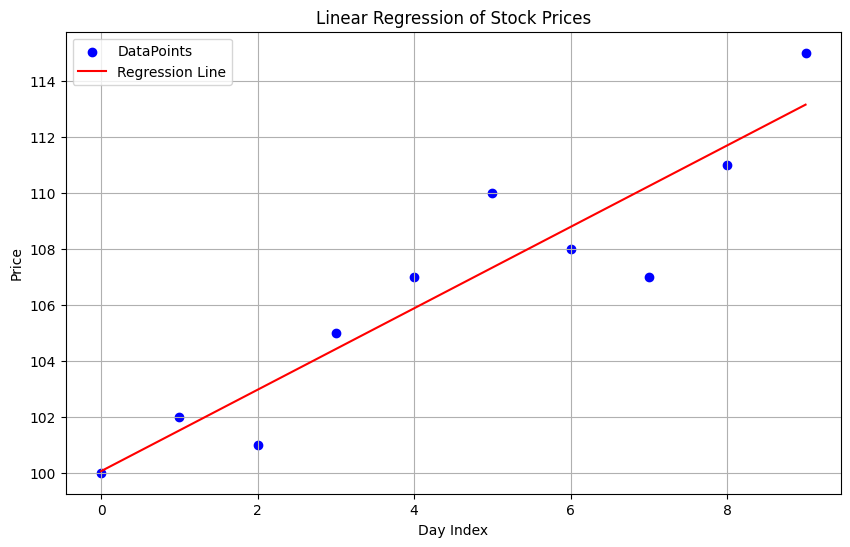

In [15]:
# Plotting for the problem above
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(prices)), prices, color='blue', label='DataPoints')
plt.plot(range(len(prices)), [m * x + b for x in range (0, len(prices))], color='red', label='Regression Line')
plt.xlabel('Day Index')
plt.ylabel('Price')
plt.title('Linear Regression of Stock Prices')
plt.legend()
plt.grid(True)
plt.show()